## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
plt.close('all')
import os
if not os.path.exists('Results'):
    os.makedirs('Results')

## Importing Data-Sets

In [2]:
# Class_Label_1 = Healthy controls
# Class_Label_0 = Patients

dataset = pd.read_csv('dataR2 - NEW.csv')
col = dataset.shape[1]
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Class
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
# x = np.random.permutation(range(116))
# dataset = dataset.iloc[x,:]

X = dataset.iloc[:,:col-1]
y = dataset.iloc[:, col-1]

print(f"X_Size = {X.shape}")
print(f"y_Size = {y.shape}")
X.head()

X_Size = (116, 9)
y_Size = (116,)


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


## Pre-Procesing The Data-sets

In [4]:
a1 = X.isnull().sum()
a1

Age            0
BMI            0
Glucose        0
Insulin        0
HOMA           0
Leptin         0
Adiponectin    0
Resistin       0
MCP.1          0
dtype: int64

In [5]:
a2 = y.isnull().sum()
a2

0

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
XN = scaler.fit_transform(X)
XN = pd. DataFrame(XN)
XN.head()

,0,1,2,3,4,5,6,7,8
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565


In [7]:
# w = int(input('Do you want to use Normalized Input? 1=Yes, 0=No '))

w = 1

if w==1:
    inputs=XN.copy()
else:
    inputs=X.copy()
    
inputs.head()

,0,1,2,3,4,5,6,7,8
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565


## Select Train & Test Data-sets

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(inputs, y, test_size=0.2, shuffle=True, random_state=None)

In [9]:
xtrain.shape

(92, 9)

In [10]:
xtest.shape

(24, 9)

In [11]:
ytrain.shape

(92,)

In [12]:
ytest.shape

(24,)

## Transform Targets into a one-hot encoding format

In [13]:
ytrain = np.asarray(ytrain)
ytest = np.asarray(ytest)

In [14]:
onehotencoder = OneHotEncoder(categories='auto')

In [15]:
y_train = onehotencoder.fit_transform(ytrain.reshape(-1, 1)).toarray()
y_test = onehotencoder.fit_transform(ytest.reshape(-1, 1)).toarray()

In [16]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [17]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Create ELM Classifier

In [18]:
input_size = xtrain.shape[1]

In [19]:
hidden_size = 100

In [20]:
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [21]:
def relu(x):
    return np.maximum(x, 0, x)

In [22]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [23]:
def train(X_Train, Y_Train):
    output_weights = np.dot(scipy.linalg.pinv2(hidden_nodes(X_Train)), Y_Train)
    return output_weights

In [24]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

## KFold Cross Validation

In [25]:
kf = KFold(n_splits=4, random_state=None, shuffle=True)

## Train ELM Classifier

In [26]:
ACC_TR = []
ACC_TS = []
ELM = []

for train_index, test_index in kf.split(xtrain):
    i = 0
    
    X_tr, X_ts = xtrain.iloc[train_index,:], xtrain.iloc[test_index,:]
    y_tr, y_ts = y_train[train_index], y_train[test_index]
    
    output_weights = train(X_tr, y_tr)
    
    y_tr_prd = predict(X_tr)
    y_tr = pd.DataFrame(y_tr).idxmax(axis=1) 
    y_tr_prd = pd.DataFrame(y_tr_prd).idxmax(axis=1)
    acc_Train = acc(y_tr, y_tr_prd)
    
    y_ts_prd = predict(X_ts)
    y_ts = pd.DataFrame(y_ts).idxmax(axis=1) 
    y_ts_prd = pd.DataFrame(y_ts_prd).idxmax(axis=1)
    acc_Test = acc(y_ts, y_ts_prd)
    
    i += 1
    
    ACC_TR.append(acc_Train)
    ACC_TS.append(acc_Test)
    ELM.append(output_weights)

In [27]:
Idx = ACC_TS.index(np.max(ACC_TS))
Idx

3

In [28]:
output_weights = ELM[Idx]

In [29]:
ACC_TR

[1.0, 1.0, 1.0, 1.0]

In [30]:
ACC_TS

[0.4782608695652174,
 0.34782608695652173,
 0.5217391304347826,
 0.6086956521739131]

## Train Results

In [31]:
ytrain_prd = predict(xtrain)

In [32]:
# y_train = pd.DataFrame(y_train).idxmax(axis=1)
ytrain_prd = pd.DataFrame(ytrain_prd).idxmax(axis=1)

In [33]:
Acc_TR = np.round(acc(ytrain, ytrain_prd),2)
Acc_TR

0.9

In [34]:
CM_TR = metrics.confusion_matrix(ytrain, ytrain_prd)

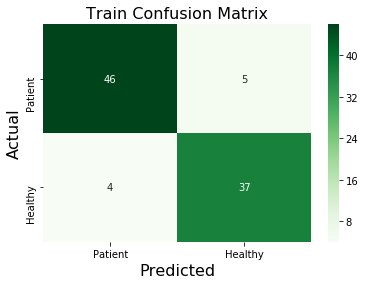

In [35]:
dfCM_TR = pd.DataFrame (CM_TR, index=['Patient', 'Healthy'], columns=['Patient', 'Healthy'])
sn.heatmap(dfCM_TR, annot=True, cmap='Greens', fmt='g')
plt.title("Train Confusion Matrix", fontsize=16)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.savefig('Results\Train_Confusion_Matrix',dpi=300)
plt.show()

In [36]:
######################## Train Results ########################
print("\n"+"*"*25+" Train Results "+"*"*25)

print(f"Acc_TR         = {Acc_TR}")

Sensitivity_TR = np.round(CM_TR[0,0]/np.sum(CM_TR[0,:]),2)
Specificity_TR = np.round(CM_TR[1,1]/np.sum(CM_TR[1,:]),2)
RMSE_TR = np.round(np.sqrt(metrics.mean_squared_error(ytrain, ytrain_prd)),2)
fpr, tpr, thresholds = metrics.roc_curve(ytrain, ytrain_prd, pos_label=1)
AUC_TR = np.round(metrics.auc(fpr, tpr),2)
f1_TR = np.round(metrics.f1_score(ytrain, ytrain_prd, average='micro'),2)

print(f"Sensitivity_TR = {Sensitivity_TR}")
print(f"Specificity_TR = {Specificity_TR}")
print(f"RMSE_TR        = {RMSE_TR}")
print(f"AUC_TR         = {AUC_TR}")
print(f"f1_score_TR    = {f1_TR}")


************************* Train Results *************************
Acc_TR         = 0.9
Sensitivity_TR = 0.9
Specificity_TR = 0.9
RMSE_TR        = 0.31
AUC_TR         = 0.9
f1_score_TR    = 0.9


In [37]:
######################## Export Text File of Train Results ########################
print("*"*25+" Train Results "+"*"*25, file=open('Results\Train_Performance.txt', 'w'))

print(f"Accuracy_Train    = {Acc_TR}", \
      file=open('Results\Train_Performance.txt', 'a'))

print(f"Sensitivity_Train = {Sensitivity_TR}", \
      file=open('Results\Train_Performance.txt', 'a'))

print(f"Specificity_Train = {Specificity_TR}", \
      file=open('Results\Train_Performance.txt', 'a'))

print(f"RMSE_Train        = {RMSE_TR}", \
      file=open('Results\Train_Performance.txt', 'a'))

print(f"AUC_Train         = {AUC_TR}", \
      file=open('Results\Train_Performance.txt', 'a'))

print(f"f1_score_Train    = {f1_TR}", \
      file=open('Results\Train_Performance.txt', 'a'))

## Test Results

In [38]:
ytest_prd = predict(xtest)

In [39]:
# y_test = pd.DataFrame(y_test).idxmax(axis=1)
ytest_prd = pd.DataFrame(ytest_prd).idxmax(axis=1)

In [40]:
Acc_TS = np.round(acc(ytest, ytest_prd),2)
Acc_TS

0.71

In [41]:
CM_TS = metrics.confusion_matrix(ytest, ytest_prd)

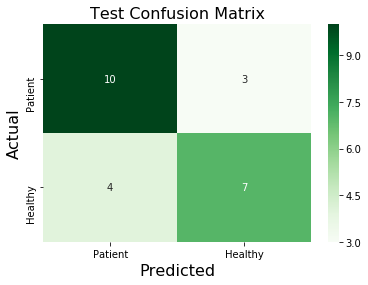

In [42]:
dfCM_TS = pd.DataFrame (CM_TS, index=['Patient', 'Healthy'], columns=['Patient', 'Healthy'])
sn.heatmap(dfCM_TS, annot=True, cmap='Greens', fmt='g')
plt.title("Test Confusion Matrix", fontsize=16)
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.savefig('Results\Test_Confusion_Matrix',dpi=300)
plt.show()

In [43]:
######################## Test Results ########################
print("\n"+"*"*25+" Test Results "+"*"*25)

print(f"Acc_TS         = {Acc_TS}")

Sensitivity_TS = np.round(CM_TS[0,0]/np.sum(CM_TS[0,:]),2)
Specificity_TS = np.round(CM_TS[1,1]/np.sum(CM_TS[1,:]),2)
RMSE_TS = np.round(np.sqrt(metrics.mean_squared_error(ytest, ytest_prd)),2)
fpr, tpr, thresholds = metrics.roc_curve(ytest, ytest_prd, pos_label=1)
AUC_TS = np.round(metrics.auc(fpr, tpr),2)
f1_TS = np.round(metrics.f1_score(ytest, ytest_prd, average='micro'),2)

print(f"Sensitivity_TS = {Sensitivity_TS}")
print(f"Specificity_TS = {Specificity_TS}")
print(f"RMSE_TS        = {RMSE_TS}")
print(f"AUC_TS         = {AUC_TS}")
print(f"f1_score_TS    = {f1_TS}")


************************* Test Results *************************
Acc_TS         = 0.71
Sensitivity_TS = 0.77
Specificity_TS = 0.64
RMSE_TS        = 0.54
AUC_TS         = 0.7
f1_score_TS    = 0.71


In [44]:
######################## Export Text File of Test Results ########################
print("*"*25+" Test Results "+"*"*25, file=open('Results\Test_Performance.txt', 'w'))

print(f"Accuracy_Test    = {Acc_TS}", \
      file=open('Results\Test_Performance.txt', 'a'))

print(f"Sensitivity_Test = {Sensitivity_TS}", \
      file=open('Results\Test_Performance.txt', 'a'))

print(f"Specificity_Test = {Specificity_TS}", \
      file=open('Results\Test_Performance.txt', 'a'))

print(f"RMSE_Test        = {RMSE_TS}", \
      file=open('Results\Test_Performance.txt', 'a'))

print(f"AUC_Test         = {AUC_TS}", \
      file=open('Results\Test_Performance.txt', 'a'))

print(f"f1_score_Test    = {f1_TS}", \
      file=open('Results\Test_Performance.txt', 'a'))